<a href="https://colab.research.google.com/github/MohamedElhossin/movie_analysis/blob/master/DataScienceChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# Connect to my google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Read the dataset 
dataset =  pd.read_csv('gdrive/My Drive/Launchpad C5/u_tmdb_5000_movies.csv')

In [ ]:
# Show the columns of movie dataset 
dataset.columns

Index(['Unnamed: 0', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'new_genres', 'main_genre'],
      dtype='object')

In [ ]:
#Selct columns title, main_genre and vote_average 
sample_df =  dataset[['title','main_genre','vote_average']]
# --> print("The index of sample_df  : " , sample_df.columns)

In [ ]:
#Select the fisrt 100 rows 
df_first100 = sample_df.iloc[:100]
# --> print("The shape of df_first100  : " , df_first100.shape)

In [ ]:
# Select movies have rating over 7.3 
movies_rating_over_7_3 = sample_df[sample_df['vote_average'] > 7.3]
# --> print("The shape of movies_rating_over_7.3  : " , movies_rating_over_7_3.shape)

In [ ]:
# Select Action movies 
action_movies  = dataset[dataset['main_genre'] == 'Action']
# -->print("The shape of action movies  : " , action_movies.shape)

In [ ]:
# Get the mean rating of all movies 
print("The mean rating of all movies : " , dataset['vote_average'].mean())

The mean rating of all movies :  6.092171559442011


In [ ]:
count = dataset['main_genre'].value_counts()

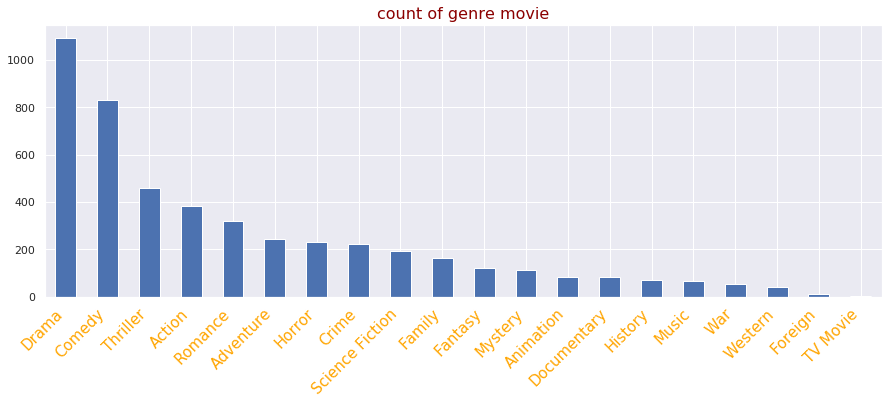

In [ ]:
count.plot(kind = "bar" , figsize=(15,5))
plt.title("count of genre movie" , fontdict = {'color':  'darkred', 'size': 16})
plt.xticks(color='orange', rotation=45, fontsize='15', horizontalalignment='right')
plt.show()

In [ ]:
# approximately the vote average 
s1 = dataset['vote_average']
dataset['rounded_average'] = s1.round()
dataset[['vote_average','rounded_average']]

,vote_average,rounded_average
0,7.2,7.0
1,6.9,7.0
2,6.3,6.0
3,7.6,8.0
4,6.1,6.0
...,...,...
4798,6.6,7.0
4799,5.9,6.0
4800,7.0,7.0
4801,5.7,6.0


In [ ]:
# change type of column release_date to datetime type
dataset['release_date'] = pd.to_datetime(dataset['release_date'])

In [ ]:
# create new three columns 
# to split the movie realse date into year, month and day  
dataset['year'] = dataset['release_date'].dt.year
dataset['month'] = dataset['release_date'].dt.month
dataset['day'] = dataset['release_date'].dt.day
# -->dataset.head()

In [ ]:
# Get the number of movies released in 2013
print("The number of movies released in 2013 is" , dataset[dataset['year'] == 2013].shape[0])

The number of movies released in 2013 is 231


In [ ]:
# Get the number of movies released in September all of the years
print("The number of movies released in september is" , dataset[dataset['month'] == 9].shape[0])

The number of movies released in september is 588


In [ ]:
# Get the number of movies released after 1/1/2013
print("The number of movies released after 1/1/2013 is" , dataset[dataset['release_date'] > '1-1-2013'].shape[0])

The number of movies released after 1/1/2013 is 786


In [ ]:
# make copy of dataset grouped by year column 
df_groupb_year = dataset.groupby('year')

In [ ]:
# Get the rating vote average of movies per year 
rating_year =  df_groupb_year['vote_average'].mean() 

In [ ]:
# print the rating vote average per year 

# -->for i in range(rating_year.shape[0]):
# -->  print(f'the rating average in {rating_year.index[i]} is {rating_year.iloc[i].round(2)}')

In [ ]:
# Get the number of movies have rating greater than 6.5
print(f"The number of years had rating average rating > 6.5 is {rating_year[rating_year > 6.5].shape[0]}")

The number of years had rating average rating > 6.5 is 48


In [ ]:
# Make copy of dateset
# Create new month_year column 
# has year and month that the movie released in 
df = dataset 
df['month_year'] = df['release_date'].dt.to_period('M')


In [ ]:
# make copy of dataset grouped by month_year column 
df_groupby_monthyear = df.groupby('month_year')

In [ ]:
# Get the average of popularity of movies 
popularity_YM =  df_groupby_monthyear['popularity'].mean()

In [ ]:
# print the rating vote average per year 

# -->for i in range(popularity_YM.shape[0]):
# -->  print(f'the popularity average in {popularity_YM.index[i]} is {popularity_YM.iloc[i].round(2)}')

In [ ]:
# Get the value counts of original language of movies 
count_lan = dataset['original_language'].value_counts()
# --> print(count_lan)

In [ ]:
# Make copy of dataset and group by main_genre column
df_groupby_maingenre = dataset.groupby('main_genre')
# -->df_groupby_maingenre.first()

In [ ]:
# Get the value counts of original language of movies per genre
count_with_english = df_groupby_maingenre['original_language'].value_counts()
# --> count_with_english

In [ ]:
# Get the count of all genre
# Get the top five genres
genre_count  = dataset['main_genre'].value_counts()
top5_index = genre_count.index[0:5]

# Get the rows with top five genres in new dataframe
df_top5 = dataset[dataset['main_genre'].isin(top5_index)]
genre_etop5_count = df_top5['main_genre'].value_counts()

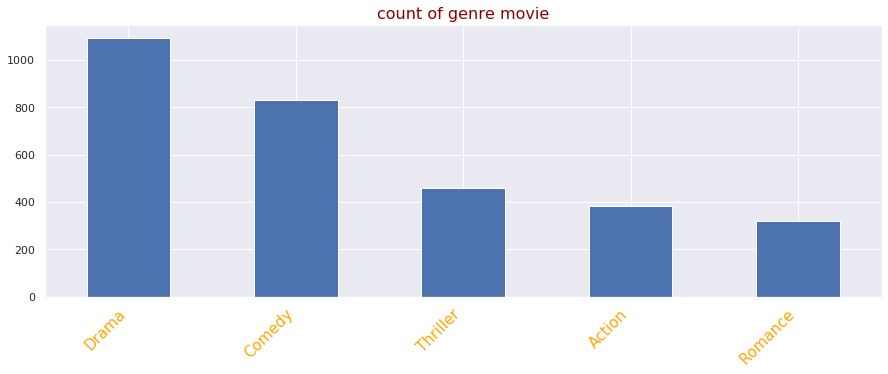

In [ ]:
# Present the count of top five genres in bar char
genre_etop5_count.plot(kind = "bar" , figsize=(15,5))
plt.title("count of genre movie" , fontdict = {'color':  'darkred', 'size': 16})
plt.xticks(color='orange', rotation=45, fontsize='15', horizontalalignment='right')
plt.show()

In [ ]:
df  = df_top5.groupby('main_genre')
pop_count = df['popularity'].mean().round(0)

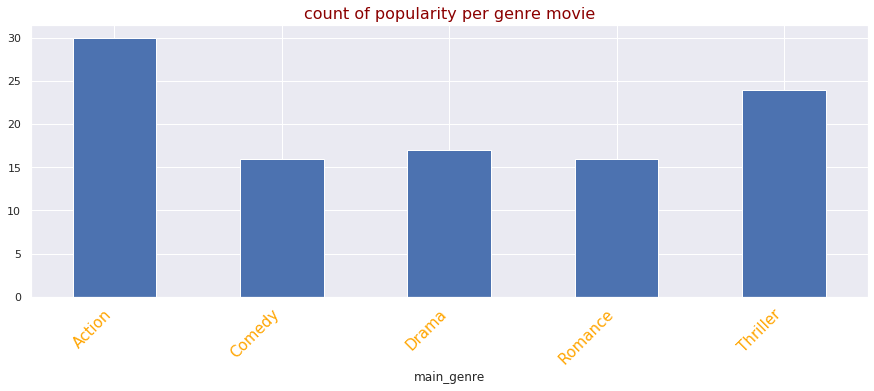

In [ ]:
# Present the count of top five genres in bar char
pop_count.plot(kind = "bar" , figsize=(15,5))
plt.title("count of popularity per genre movie" , fontdict = {'color':  'darkred', 'size': 16})
plt.xticks(color='orange', rotation=45, fontsize='15', horizontalalignment='right')
plt.show()

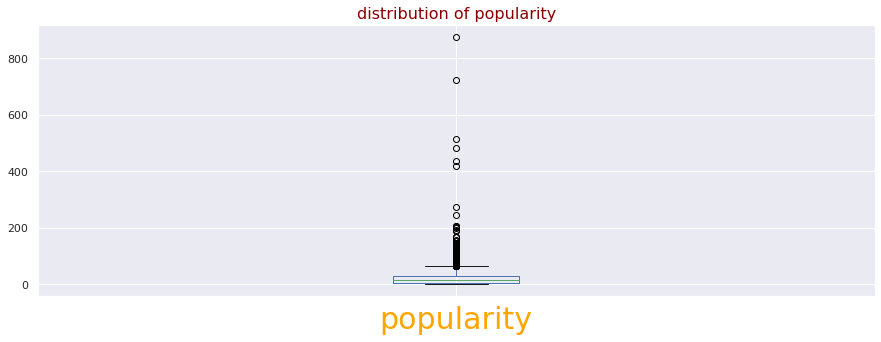

In [ ]:

# Present the distribution of popularity
dataset['popularity'].plot(kind = "box" , figsize=(15,5),)
plt.title("distribution of popularity" , fontdict = {'color':  'darkred', 'size': 16})
plt.xticks(color='orange', rotation=0, fontsize='30', horizontalalignment='center')
plt.show()